# Importing all libraries

loading all the libraries required for the project. Tensorflow is used to build the model. Numpy,pandas and sklearn is used to preprocess the data. PIL and matplotlib is required to do image operations.

In [18]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd

list immediate items(folders) in the directory

In [2]:
os.listdir('MRI-Scan')

['no', 'yes']

## Preprocessing

Open the folders and map it alongside respective targets.

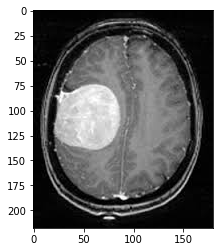

In [10]:
import cv2
directory="MRI-Scan"
category=["Yes","No"]

for cat in category:
    path=os.path.join(directory,cat)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

All images being fed to on particular neural network needs to have a fixed shape. Hence we need to reshape our images accordingly to a fixed shape we mention in the input_shape parameter in model creation. 

 (218, 180)


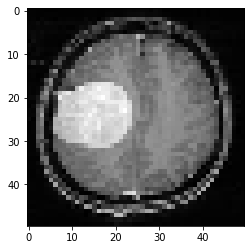

In [11]:
print("",img_array.shape)
new_array=cv2.resize(img_array,(50,50))
plt.imshow(new_array,cmap="gray")
plt.show()

Encode the output labels into integers 0 and 1.

In [12]:
enc = OneHotEncoder()
enc.fit([[0], [1]]) 
def names(number):
    if(number == 0):
        return 'Tumor'
    else:
        return 'Normal'

In [13]:
data = []
paths = []
ans = []
for r, d, f in os.walk('MRI-Scan/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((128,128))
    x = np.array(x)
    if(x.shape == (128,128,3)):
        data.append(np.array(x))
        ans.append(enc.transform([[0]]).toarray())


In [14]:
paths = []
for r, d, f in os.walk("MRI-Scan/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((128,128))
    x = np.array(x)
    if(x.shape == (128,128,3)):
        data.append(np.array(x))
        ans.append(enc.transform([[1]]).toarray())


In [15]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [16]:
ans = np.array(ans)
ans = ans.reshape(139,2)

## Model Creation

In [19]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='selu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='selu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='selu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adadelta',metrics=['accuracy'])
print(model.summary())

# model = Sequential()

# # Must define the input shape in the first layer of the neural network
# model.add(Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(128,128,3))) 
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.45))

# model.add(Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))

# model.add(Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))

# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.15))


# model.add(Dense(2, activation='softmax'))

# # Take a look at the model summary
# model.compile(loss = "categorical_crossentropy", optimizer='Adadelta',metrics=['accuracy'])
# print(model.summary())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

## Train-Test Split

Split the data into training and testing sets.

In [20]:
x_train,x_test,y_train,y_test = train_test_split(data, ans, test_size=0.2, shuffle=True, random_state=69)

## Training

In [21]:
history = model.fit(x_train, y_train, epochs=30, batch_size=40, verbose=1,validation_data=(x_test, y_test))

Train on 111 samples, validate on 28 samples
Epoch 1/30
111/111 [==============================] - 52s 473ms/sample - loss: 2.0101 - accuracy: 0.3423 - val_loss: 3.1001 - val_accuracy: 0.5000
Epoch 2/30
111/111 [==============================] - 25s 228ms/sample - loss: 1.3618 - accuracy: 0.4955 - val_loss: 2.5485 - val_accuracy: 0.5357
Epoch 3/30
111/111 [==============================] - 21s 192ms/sample - loss: 1.2954 - accuracy: 0.5045 - val_loss: 2.5165 - val_accuracy: 0.5714
Epoch 4/30
111/111 [==============================] - 22s 195ms/sample - loss: 1.3746 - accuracy: 0.4865 - val_loss: 2.2909 - val_accuracy: 0.5714
Epoch 5/30
111/111 [==============================] - 21s 193ms/sample - loss: 0.9353 - accuracy: 0.6126 - val_loss: 2.0707 - val_accuracy: 0.5714
Epoch 6/30
111/111 [==============================] - 22s 202ms/sample - loss: 1.1885 - accuracy: 0.6036 - val_loss: 1.7410 - val_accuracy: 0.5714
Epoch 7/30
111/111 [==============================] - 22s 199ms/sample - 

In [22]:
from keras.models import model_from_json
model_json = model.to_json()
with open("braintumormodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("braintumormodel.h5")
print("Saved model to disk")

Saved model to disk


In [24]:
from tensorflow.keras.models import model_from_json
json_file = open('braintumormodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("braintumormodel.h5")
print("Loaded model from disk")

Loaded model from disk


97.80282378196716% Confidence This Is Tumor


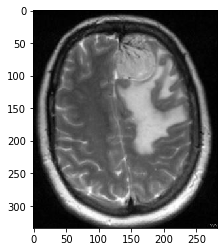

In [25]:
img = Image.open('MRI-Scan/yes/Y158.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = loaded_model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

95.39836049079895% Confidence This Is Normal


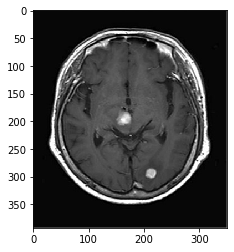

In [26]:
img = Image.open('MRI-Scan/no/N17.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = loaded_model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))